In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(1) pd.read_csv/

TEST 2017年5月10日20:06:14

In [2]:
! cat "/data/project/GitHubI/PyTools/037.The_list_of_pandas.csv"

a,b
1,2
1,2
3,4
2,4

In [3]:
r = pd.read_csv('/data/project/GitHubI/PyTools/037.The_list_of_pandas.csv')
row = next(r.iterrows())[1]
row

a    1
b    2
Name: 0, dtype: int64

In [4]:
for i in r.itertuples():
    print(i)
    

Pandas(Index=0, a=1, b=2)
Pandas(Index=1, a=1, b=2)
Pandas(Index=2, a=3, b=4)
Pandas(Index=3, a=2, b=4)


In [5]:
for i in r.memory_usage():
    print(i)
    

80
32
32


(2) np.random.randn/ query/

TEST 2017年5月10日20:06:14

In [6]:
df = pd.DataFrame(np.random.randn(10, 2), columns=list('ab'))
df

,a,b
0,-0.383886,-1.647527
1,0.831821,-1.355180
2,0.636969,0.261307
3,0.092272,-1.322947
4,-2.554606,0.324021
5,1.361049,-0.510634
6,0.450406,1.169965
7,-0.113105,-0.613422
8,-0.631325,0.677360
9,-1.054822,-0.736196


In [7]:
df.query('a > b')

,a,b
0,-0.383886,-1.647527
1,0.831821,-1.355180
2,0.636969,0.261307
3,0.092272,-1.322947
5,1.361049,-0.510634
7,-0.113105,-0.613422


In [8]:
df[df.a > df.b]


,a,b
0,-0.383886,-1.647527
1,0.831821,-1.355180
2,0.636969,0.261307
3,0.092272,-1.322947
5,1.361049,-0.510634
7,-0.113105,-0.613422


(3) pd.Series/

TEST 2017年5月19日 20:43:58

In [9]:
series = pd.Series([20, 21, 12, None], index=['London', 'New York', 'Helsinki', 'a'])
series
# print(series)
# print(series.describe())
# print(series.set_value('London', None))
# print(series.dropna(how='all'))
# print(series.dropna(how='all').describe())

London      20.0
New York    21.0
Helsinki    12.0
a            NaN
dtype: float64

In [10]:
series.describe()


count     3.000000
mean     17.666667
std       4.932883
min      12.000000
25%      16.000000
50%      20.000000
75%      20.500000
max      21.000000
dtype: float64

In [11]:
series.set_value('London', None)
series

/data/soft/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


London       NaN
New York    21.0
Helsinki    12.0
a            NaN
dtype: float64

In [12]:
series.dropna(how='all')

New York    21.0
Helsinki    12.0
dtype: float64

In [13]:
series.dropna(how='all').describe()

count     2.000000
mean     16.500000
std       6.363961
min      12.000000
25%      14.250000
50%      16.500000
75%      18.750000
max      21.000000
dtype: float64

(4) arg/ 

TEST 2017-5-19 22:40:58

In [14]:
def a1(*args):
    print(args[0])

a1(1, 3)

1


In [15]:
def a2(**kwargs):
    if 'hi' in kwargs:
        print(kwargs['hi'])
    else:
        print(1)

a2()

1


In [16]:
def a3(a, *args):
    print(a, args[0])

a3(1, 3)

1 3


(5) nan/

In [17]:
a = np.nan
b = np.nan

In [18]:
id(a), id(b)

(140484325988968, 140484325988968)

In [19]:
a == b

False

In [20]:
a is b

True

In [21]:
'a' == 'a', 'a' is 'a'

(True, True)

In [22]:
1.2 == 1.2, 1.2 is 1.2

(True, True)

In [23]:
a = pd.Series([1, np.nan])
for i in a:
    print(i, i is np.nan)

1.0 False
nan False


In [24]:
a

0    1.0
1    NaN
dtype: float64

In [25]:
a[1]

nan

In [26]:
a[1] is np.nan, a[1] is np.NaN

(False, False)

In [27]:
b = np.nan

In [28]:
b is np.nan

True

(6) isin?/

In [29]:
spe = [-999, 85, np.nan]
a = pd.Series([1, -999, -999, 85, np.nan, 85])

In [30]:
%time pd.value_counts(a[[each in spe for each in a] + a.isnull()],dropna=False)

CPU times: user 2.86 ms, sys: 972 µs, total: 3.84 ms
Wall time: 3.06 ms


 85.0     2
-999.0    2
NaN       1
dtype: int64

In [31]:
%time pd.value_counts(a[a.isin(spe)|(a.isnull())], dropna=False)

CPU times: user 1.8 ms, sys: 726 µs, total: 2.53 ms
Wall time: 1.96 ms


 85.0     2
-999.0    2
NaN       1
dtype: int64

(7) matplotlib/ boxplot/

箱形图

In [32]:
ta = pd.DataFrame([
    [20, 21, 12, 13],
    [2, 4, 1, 12],
    [20, 21, 12, 13],
    [2, 4, 1, 12]
], columns=['1', '2', '3', '4'])
ta.describe()

,1,2,3,4
count,4.000000,4.000000,4.000000,4.00000
mean,11.000000,12.500000,6.500000,12.50000
std,10.392305,9.814955,6.350853,0.57735
min,2.000000,4.000000,1.000000,12.00000
25%,2.000000,4.000000,1.000000,12.00000
50%,11.000000,12.500000,6.500000,12.50000
75%,20.000000,21.000000,12.000000,13.00000
max,20.000000,21.000000,12.000000,13.00000


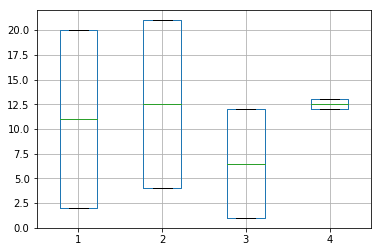

In [33]:
ta.boxplot(return_type='axes')

(8) get_dummies/

In [34]:
tb = pd.DataFrame([
    ["20", 21, 12, 13],
    ["2", 4, 1, 12],
    ["20", 21, 12, 13],
    ["", 4, 1, 12],
    [np.nan, 4, 1, 12]
], columns=list("ABCD"))
tb

,A,B,C,D
0,20,21,12,13
1,2,4,1,12
2,20,21,12,13
3,,4,1,12
4,NaN,4,1,12


In [35]:
for i in tb:
    print(pd.value_counts(tb[i]))

20    2
2     1
      1
Name: A, dtype: int64
4     3
21    2
Name: B, dtype: int64
1     3
12    2
Name: C, dtype: int64
12    3
13    2
Name: D, dtype: int64


In [36]:
pd.get_dummies(tb)

,B,C,D,A_,A_2,A_20
0,21,12,13,0,0,1
1,4,1,12,0,1,0
2,21,12,13,0,0,1
3,4,1,12,1,0,0
4,4,1,12,0,0,0


In [37]:
pd.get_dummies(tb, dummy_na=True)

,B,C,D,A_,A_2,A_20,A_nan
0,21,12,13,0,0,1,0
1,4,1,12,0,1,0,0
2,21,12,13,0,0,1,0
3,4,1,12,1,0,0,0
4,4,1,12,0,0,0,1


(9) Series*/

TEST 2017年5月23日08:10:09

In [38]:
tc = pd.get_dummies(tb)
tc

,B,C,D,A_,A_2,A_20
0,21,12,13,0,0,1
1,4,1,12,0,1,0
2,21,12,13,0,0,1
3,4,1,12,1,0,0
4,4,1,12,0,0,0


In [39]:
tc1 = tc['B'] > 0
tc2 = tc[['A_', 'A_2', 'A_20']]

In [40]:
for k in tc2:
    name_n = str(tc1.name)+'_'+str(tc2[k].name)
    print(pd.Series(tc1 * tc2[k], name=name_n))

0    0
1    0
2    0
3    1
4    0
Name: B_A_, dtype: uint8
0    0
1    1
2    0
3    0
4    0
Name: B_A_2, dtype: uint8
0    1
1    0
2    1
3    0
4    0
Name: B_A_20, dtype: uint8


(10) del/ drop/

In [41]:
td = pd.DataFrame(
    {
        1: [1, 3, 4, 5, 6],
        2: [1, 1, 4, 5, 6],
        3: [1, 3, 1, 5, 6],
        4: [1, 3, 4, 1, 6],
        5: [1, 3, 4, 5, 1]
     }
)
td

,1,2,3,4,5
0,1,1,1,1,1
1,3,1,3,3,3
2,4,4,1,4,4
3,5,5,5,1,5
4,6,6,6,6,1


In [42]:
# del td[1, 2]
# td

td = td.drop([1, 2], axis=1)
td

,3,4,5
0,1,1,1
1,3,3,3
2,1,4,4
3,5,1,5
4,6,6,1


(11) code/

```
import numpy as np

def generate_clustered_data(seed=0, n_clusters=3, n_features=2,
                            n_samples_per_cluster=20, std=.4):
    prng = np.random.RandomState(seed)

    # the data is voluntary shifted away from zero to check clustering
    # algorithm robustness with regards to non centered data
    means = np.array([[1, 1, 1, 0],
                      [-1, -1, 0, 1],
                      [1, -1, 1, 1],
                      [-1, 1, 1, 0],
                     ]) + 10
    print(means)

    X = np.empty((0, n_features))
    print(X)

    for i in range(n_clusters):
        X = np.r_[X, means[i][:n_features]
                  + std * prng.randn(n_samples_per_cluster, n_features)]
        print(X)
    return X
generate_clustered_data()
```

```
import numpy as np

from sklearn.utils.testing import assert_equal
from sklearn.utils.testing import assert_array_equal
from sklearn.utils.testing import assert_raises

from sklearn.cluster.affinity_propagation_ import AffinityPropagation
from sklearn.cluster.affinity_propagation_ import affinity_propagation
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import euclidean_distances

n_clusters = 3
centers = np.array([[1, 1], [-1, -1], [1, -1]]) + 10
print(centers)

X, _ = make_blobs(n_samples=60, n_features=2, centers=centers,
                  cluster_std=0.4, shuffle=True, random_state=0)
# print(X)


def test_affinity_propagation():
    # Affinity Propagation algorithm
    # Compute similarities
    S = -euclidean_distances(X, squared=True)
    print(S)

    preference = np.median(S) * 10
    print(preference)

    cluster_centers_indices, labels = affinity_propagation(
        S, preference=preference)
    print(cluster_centers_indices, labels)

    n_clusters_ = len(cluster_centers_indices)

    assert_equal(n_clusters, n_clusters_)

    af = AffinityPropagation(preference=preference, affinity="precomputed")
    labels_precomputed = af.fit(S).labels_
    print(labels_precomputed)

    af = AffinityPropagation(preference=preference, verbose=True)
    labels = af.fit(X).labels_
    print(labels)

    assert_array_equal(labels, labels_precomputed)

    cluster_centers_indices = af.cluster_centers_indices_
    print(cluster_centers_indices)

    n_clusters_ = len(cluster_centers_indices)
    assert_equal(np.unique(labels).size, n_clusters_)
    assert_equal(n_clusters, n_clusters_)

    # Test also with no copy
    _, labels_no_copy = affinity_propagation(S, preference=preference,
                                             copy=False)
    assert_array_equal(labels, labels_no_copy)

    # Test input validation
    assert_raises(ValueError, affinity_propagation, S[:, :-1])
    assert_raises(ValueError, affinity_propagation, S, damping=0)
    af = AffinityPropagation(affinity="unknown")
    assert_raises(ValueError, af.fit, X)
test_affinity_propagation()


def test_affinity_propagation_predict():
    # Test AffinityPropagation.predict
    af = AffinityPropagation(affinity="euclidean")
    labels = af.fit_predict(X)
    labels2 = af.predict(X)
    assert_array_equal(labels, labels2)


def test_affinity_propagation_predict_error():
    # Test exception in AffinityPropagation.predict
    # Not fitted.
    af = AffinityPropagation(affinity="euclidean")
    assert_raises(ValueError, af.predict, X)

    # Predict not supported when affinity="precomputed".
    S = np.dot(X, X.T)
    af = AffinityPropagation(affinity="precomputed")
    af.fit(S)
    assert_raises(ValueError, af.predict, X)
```

(12) ks/ 

TODO:

In [43]:
from scipy.stats import ks_2samp
ta=[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
      0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a0=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
a1=[2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
      0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0]
a2=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a3=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
a4=[0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a5=[0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a6=[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

ta = pd.Series(ta)
a0 = pd.Series(a0)
a1 = pd.Series(a1)
a2 = pd.Series(a2)
a3 = pd.Series(a3)
a4 = pd.Series(a4)
a5 = pd.Series(a5)
a6 = pd.Series(a6)

get_ks = lambda y1, y2: ks_2samp(y1[y2 == y1], y1[y2 != y1]).statistic

In [44]:
print('a0', get_ks(ta, a0))
print('a1', get_ks(ta, a1))
print('a2', get_ks(ta, a2))
print('a3', get_ks(ta, a3))
print('a4', get_ks(ta, a4))
print('a5', get_ks(ta, a5))
print('a6', get_ks(ta, a6))

a0 0.6296296296296295
a1 0.2065217391304348
a2 0.7777777777777778
a3 1.0
a4 0.4818577648766328
a5 0.4818577648766328
a6 0.6491228070175439
